In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#读取数据
df = pd.read_csv('../../data/knn.csv')
df  # data frame

,Brand,Type,Color,Construction Year,Odometer,Ask Price,Days Until MOT,HP
0,Peugeot 106,1.0,blue,2002,166879,999,138,60
1,Peugeot 106,1.0,blue,1998,234484,999,346,60
2,Peugeot 106,1.1,black,1997,219752,500,-5,60
3,Peugeot 106,1.1,red,2001,223692,750,-87,60
4,Peugeot 106,1.1,grey,2002,120275,1650,356,59
5,Peugeot 106,1.1,red,2003,131358,1399,266,60
6,Peugeot 106,1.1,green,1999,304277,799,173,57
7,Peugeot 106,1.4,green,1998,93685,1300,0,75
8,Peugeot 106,1.1,white,2002,225935,950,113,60
9,Peugeot 106,1.4,green,1997,252319,650,133,75


In [5]:
#清洗数据
# 把颜色独热编码 (One-Hot Encoding)
df_colors = df['Color'].str.get_dummies().add_prefix('Color: ')
# 把类型独热编码
df_type = df['Type'].apply(str).str.get_dummies().add_prefix('Type: ')
# 添加独热编码数据列
df = pd.concat([df, df_colors, df_type], axis=1)
# 去除独热编码对应的原始列
df = df.drop(['Brand', 'Type', 'Color'], axis=1)

df


,Construction Year,Odometer,Ask Price,Days Until MOT,HP,Color: black,Color: blue,Color: green,Color: grey,Color: red,Color: white,Type: 1.0,Type: 1.1,Type: 1.4
0,2002,166879,999,138,60,0,1,0,0,0,0,1,0,0
1,1998,234484,999,346,60,0,1,0,0,0,0,1,0,0
2,1997,219752,500,-5,60,1,0,0,0,0,0,0,1,0
3,2001,223692,750,-87,60,0,0,0,0,1,0,0,1,0
4,2002,120275,1650,356,59,0,0,0,1,0,0,0,1,0
5,2003,131358,1399,266,60,0,0,0,0,1,0,0,1,0
6,1999,304277,799,173,57,0,0,1,0,0,0,0,1,0
7,1998,93685,1300,0,75,0,0,1,0,0,0,0,0,1
8,2002,225935,950,113,60,0,0,0,0,0,1,0,1,0
9,1997,252319,650,133,75,0,0,1,0,0,0,0,0,1


Text(0.5, 1.0, 'Car Price Variables')

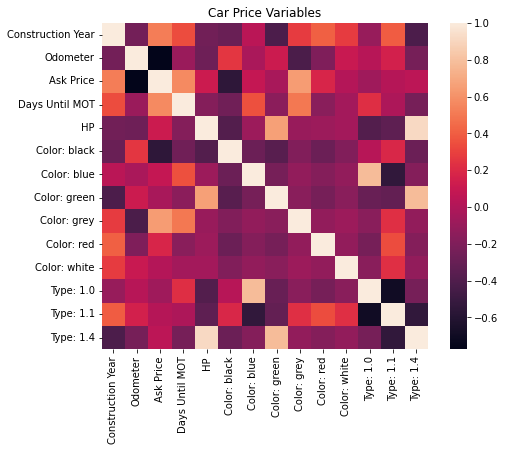

In [6]:
# 数据转换
matrix = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, square=True)
plt.title('Car Price Variables')


In [7]:
#sns.pairplot(df[['Construction Year', 'Days Until MOT', 'Odometer', 'Ask Price']], size=2)
#plt.show()

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df[['Construction Year', 'Days Until MOT', 'Odometer']]
y = df['Ask Price'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

X_normalizer = StandardScaler() # N(0,1)
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train.ravel())

#Now we can predict prices:
y_pred = knn.predict(X_test)
y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

# Build a plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted ask price')
plt.ylabel('Ask price')
plt.show()

print(y_pred_inv)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.36676513  1.36676513 -0.68269804  0.13462294].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred

array([ 1.36676513,  1.36676513, -0.68269804,  0.13462294])

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred_inv, y_test_inv)


175.5

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred_inv, y_test_inv)

56525.5

In [ ]:
y_pred_inv


array([1199., 1199.,  700.,  899.])

In [ ]:
 y_test_inv

array([[1300.],
       [1650.],
       [ 650.],
       [ 799.]])